In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
forest_data = gpd.read_file("Data_OSM/gis_osm_landuse_a_free_1.shp")
natural = gpd.read_file("Data_OSM/gis_osm_natural_free_1.shp")
places = gpd.read_file("Data_OSM/gis_osm_places_a_free_1.shp")
water = gpd.read_file("Data_OSM/gis_osm_water_a_free_1.shp")
waterways = gpd.read_file("Data_OSM/gis_osm_waterways_free_1.shp")

In [4]:

forest_data["fclass"].unique()

array(['park', 'cemetery', 'meadow', 'nature_reserve', 'grass',
       'military', 'recreation_ground', 'residential', 'forest',
       'industrial', 'commercial', 'farmyard', 'allotments', 'farmland',
       'retail', 'quarry', 'scrub', 'heath', 'vineyard', 'orchard'],
      dtype=object)

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
forest_data[forest_data['fclass'] == 'forest'].plot(ax=ax, color="green", edgecolor='white', linewidth=0.2)
forest_data[forest_data['fclass'] == 'nature_reserve'].plot(ax=ax, color="yellow", edgecolor='white', linewidth=0.2)
forest_data[forest_data['fclass'] == 'meadow'].plot(ax=ax, color="lightgreen", edgecolor='white', linewidth=0.2)
water[water['fclass'] == 'water'].plot(ax=ax, color="blue", edgecolor='white', linewidth=0.2)
waterways.plot(ax=ax, color="lightblue", linewidth=0.2)

plt.show()

In [ ]:
protected_forest = forest_data[forest_data['fclass'] == 'nature_reserve']

fig, ax = plt.subplots(figsize=(10, 10))
protected_forest.plot(ax=ax, color='green', edgecolor='white', linewidth=0.2)

plt.show()


In [7]:
# this cell takes around 20 min to run 
# Calculate the total area of Denmark
denmark_area = forest_data.geometry.unary_union.area

# Calculate the area of each class in the forest_data
class_areas = forest_data.groupby('fclass').geometry.apply(lambda x: x.unary_union.area)

# Calculate the percentage area of each class
percentage_areas = (class_areas / denmark_area) * 100

# Print the percentage area of each class
print(percentage_areas)

fclass
allotments            0.084528
cemetery              0.046441
commercial            0.083708
farmland             43.917651
farmyard              1.743797
forest               18.641884
grass                 0.352947
heath                 2.318086
industrial            1.023084
meadow                4.849192
military             13.021049
nature_reserve        7.643589
orchard               0.103038
park                  0.297893
quarry                0.133126
recreation_ground     0.193373
residential           6.847647
retail                0.029263
scrub                 0.651769
vineyard              0.003510
Name: geometry, dtype: float64


In [ ]:
import folium

forest_copenhagen = forest_data[forest_data['fclass'] == 'forest']
copenhagen_map = folium.Map(location=[55.6761, 12.5683], zoom_start=12)
folium.GeoJson(forest_copenhagen).add_to(copenhagen_map)


copenhagen_map


In [9]:
soil_data = gpd.read_file("Soil/Jordart_200000_shape/Jordart_200000.shp")

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
soil_data.plot(ax=ax, color='brown', edgecolor='white', linewidth=0.2)

In [11]:
forest_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
soil_data.crs 

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
soil_data.head()

TSYM        AREA Version  Area_km2  \
0   DL  116251.917      v2  0.116252   
1   DL  167303.038      v2  0.167303   
2   DL   26405.773      v2  0.026406   
3   DL  247422.409      v2  0.247422   
4   DL   68035.296      v2  0.068035   

                                            geometry  
0  POLYGON ((495747.330 6165273.864, 495755.198 6...  
1  POLYGON ((500984.107 6164927.508, 500892.586 6...  
2  POLYGON ((462183.969 6166563.025, 462121.850 6...  
3  POLYGON ((461379.463 6166164.586, 461224.377 6...  
4  POLYGON ((462296.861 6166649.768, 462161.598 6...

In [14]:
soil_data["TSYM"].unique()

array(['DL', 'DSG', 'ED', 'ES', 'F', 'FYLD', 'GC', 'GL', 'GS', 'HG',
       'HSL', 'HV', 'KS', 'LL', 'ML', 'MSG', 'PL', 'SK', 'SØ', 'T', 'ZK',
       'Y', 'OL', 'GNG', 'HAG', 'VAG', 'JV', 'SVG', 'ROG', 'PAM', 'KA',
       'RG', 'EQ', 'KQ', 'BS', 'AF', 'CV'], dtype=object)

In [15]:
soil_data['Type'] = soil_data['TSYM'].replace({'ES': 'flyvesand', 'F': 'ferskvandsdannelser', "HV": "Marskaflejringer",
                                                "HSL" : "Marint sand og ler", "HG" : "Strandvolde", "MSG" : "Morænesand og -grus",
                                                "ML": "Moræneler", "DSG": "Smeltevandssand og grus", "DL" : "Smeltevandsler",
                                                "T" : "Ekstramarginale aflejringer", "Y": "Ældre havaflejringer", 
                                                "AF": "Arnagerkalk med fosforit konglomerat",
                                                "BS": "Grønsand", "CV": "Vekslende lag af ler og sand",
                                                "ED": "Eocænt moler med vulkanske askelag","EQ": "Nexø sandsten",
                                                "GC": "Miocænt sand med vekslende lag af brunkul og ler",
                                                "GL": "Udifferentieret glimmerholdigt tertiært ler",
                                                "GNG": "Den Bornholmske grå gnejs",
                                                "GS": "Udifferentieret tertiært glimmersand",
                                                "HAG": "Hammer granit",
                                                "JV": "Vekslende lag af kul, ler og sand",
                                                "KA": "Kaolin",
                                                "KQ": "Balka sandsten",
                                                "KS": "Kvartssand stedvis med indslag af glimmerler",
                                                "LL": "Eocænt plastisk ler",
                                                "OL": "Oligocænt glimmerholdigt ler",
                                                "PAM": "Paradisbakke migmatit","PL": "Paleocænt plastisk ler og mergel",
                                                "RG": "Robbedalegrus","ROG": "Rønne granit",
                                                "SK": "Skrivekridt med flint","SVG": "Svaneke granit",
                                                "VAG": "Vang granit",
                                                "ZK": "Danienkalk med flint" })


<Axes: >

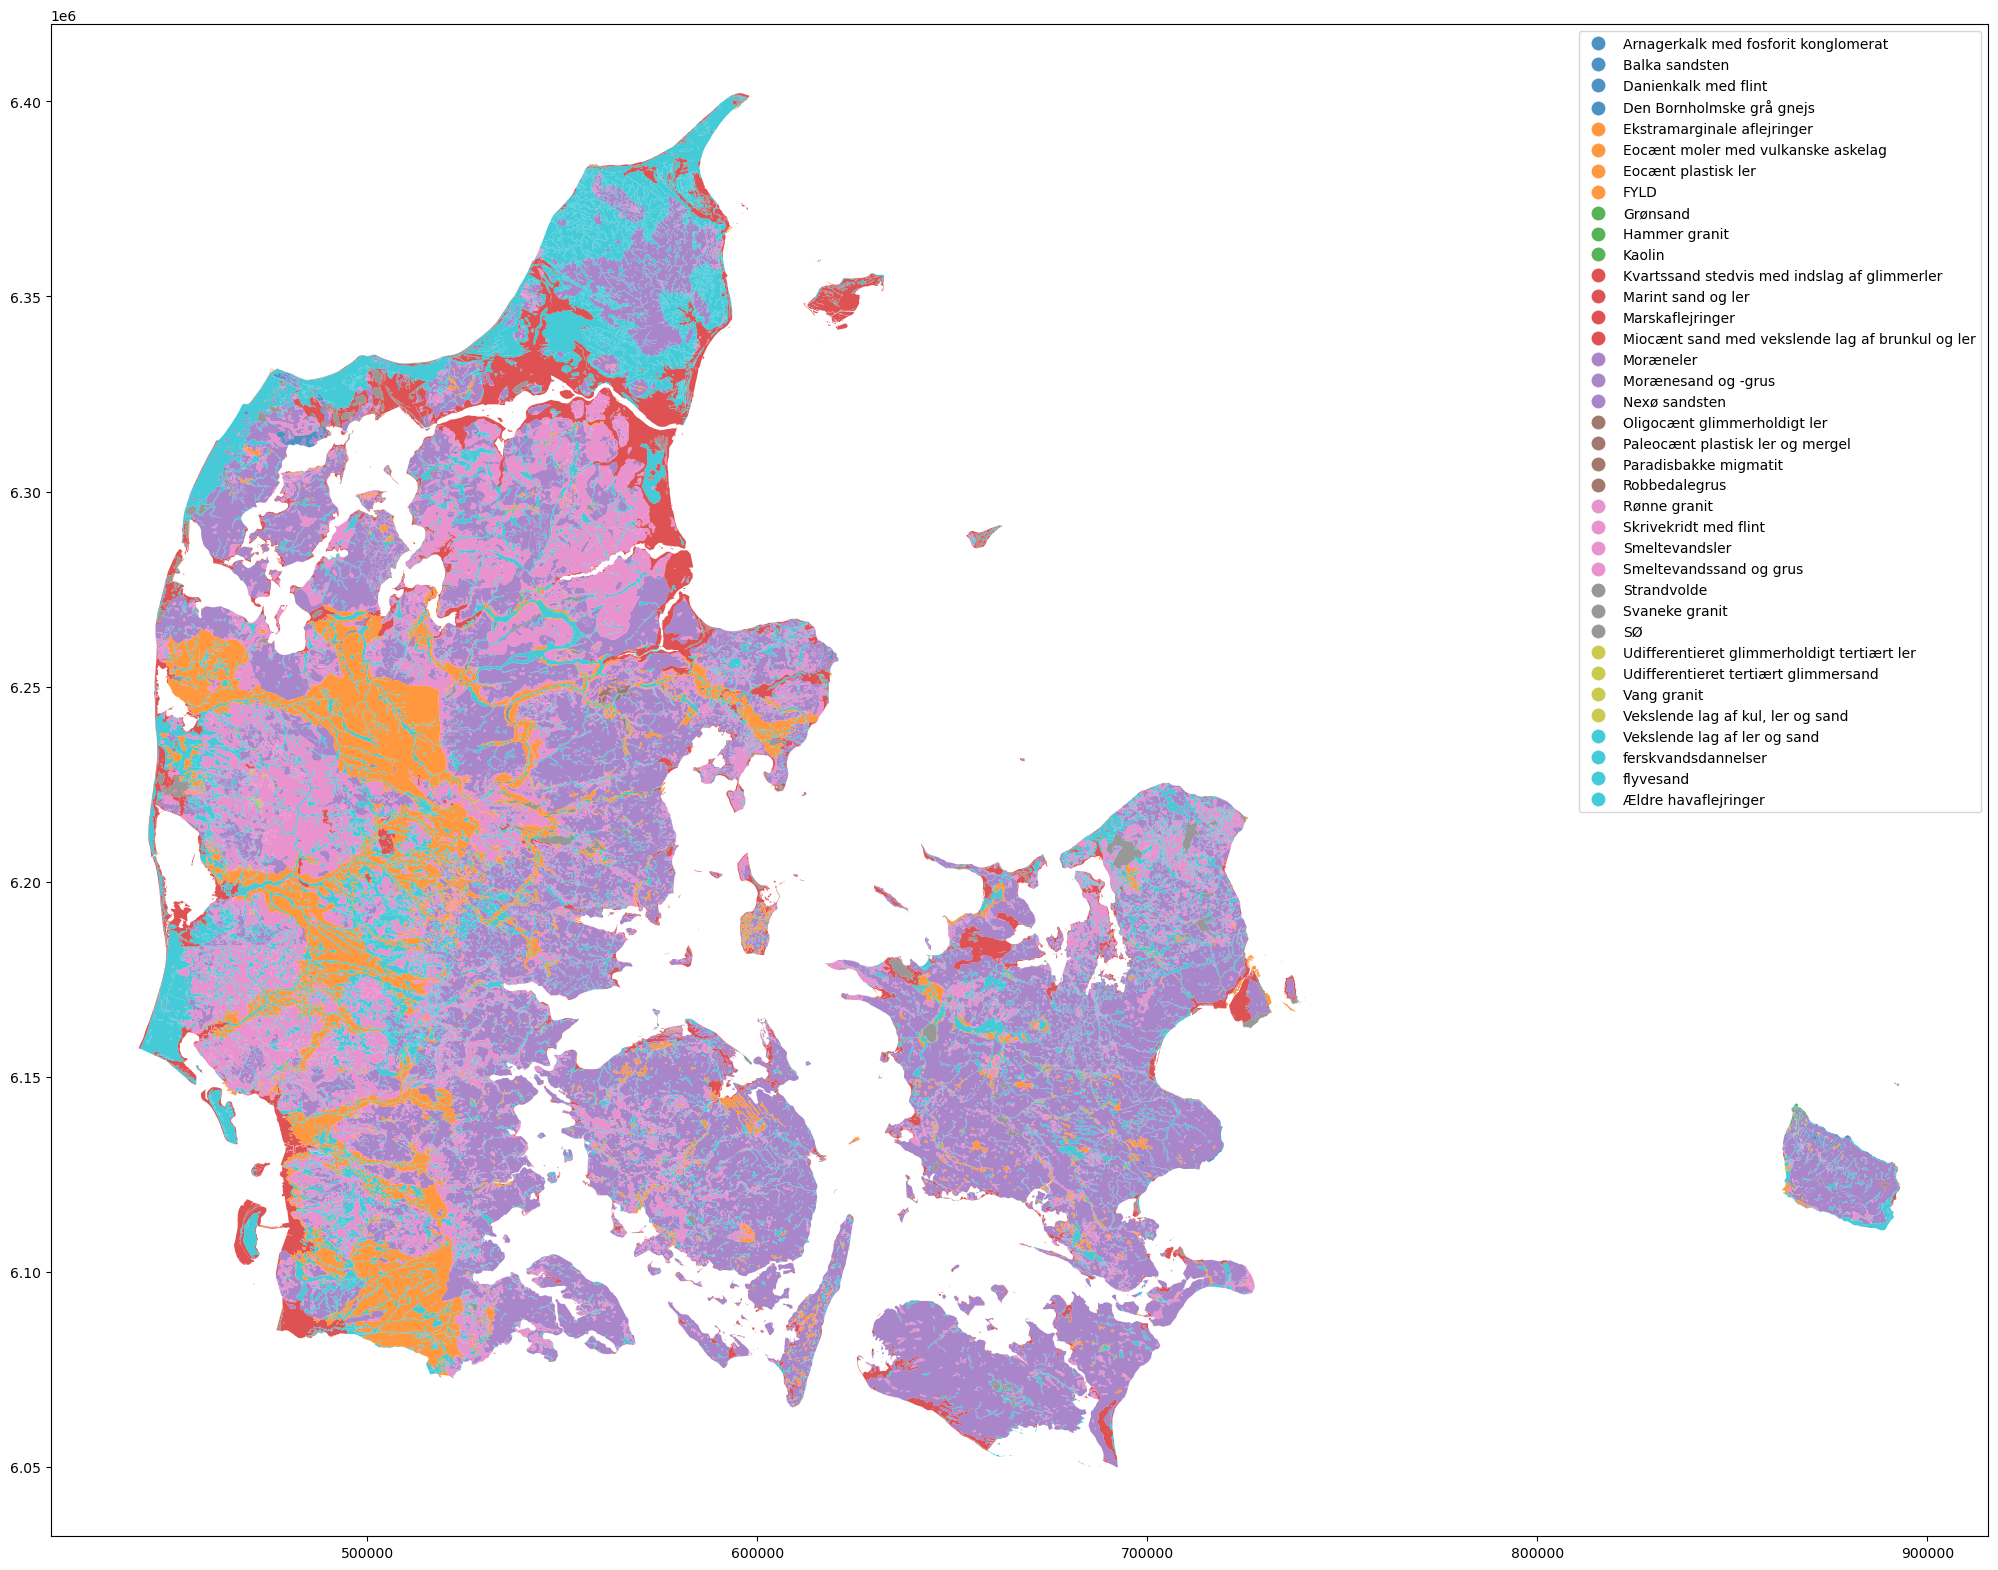

In [16]:
fig, ax = plt.subplots(figsize=(25, 25))
soil_data.plot(column='Type', legend=True, ax=ax, figsize=(10, 10), alpha=0.8)
# Move the legend outside the plo


In [17]:
soil_data

TSYM         AREA Version  Area_km2  \
0       DL   116251.917      v2  0.116252   
1       DL   167303.038      v2  0.167303   
2       DL    26405.773      v2  0.026406   
3       DL   247422.409      v2  0.247422   
4       DL    68035.296      v2  0.068035   
...    ...          ...     ...       ...   
24187    T  2397974.805      v2  0.000000   
24188    T  2397974.805      v2  0.000000   
24189    T  2397974.805      v2  0.000000   
24190    T  2397974.805      v2  0.000000   
24191    F   119054.906      v2  0.000000   

                                                geometry  \
0      POLYGON ((495747.330 6165273.864, 495755.198 6...   
1      POLYGON ((500984.107 6164927.508, 500892.586 6...   
2      POLYGON ((462183.969 6166563.025, 462121.850 6...   
3      POLYGON ((461379.463 6166164.586, 461224.377 6...   
4      POLYGON ((462296.861 6166649.768, 462161.598 6...   
...                                                  ...   
24187  POLYGON ((520838.579 6073267.650, 520824.438 6...   
24188  POLYGON ((519000.063 6072930.000, 518972.281 6...   
24189  POLYGON ((518558.562 6072973.500, 518554.625 6...   
24190  POLYGON ((518959.094 6072764.000, 519000.063 6...   
24191  POLYGON ((522945.973 6074308.962, 522925.969 6...   

                              Type  
0                   Smeltevandsler  
1                   Smeltevandsler  
2                   Smeltevandsler  
3                   Smeltevandsler  
4                   Smeltevandsler  
...                            ...  
24187  Ekstramarginale aflejringer  
24188  Ekstramarginale aflejringer  
24189  Ekstramarginale aflejringer  
24190  Ekstramarginale aflejringer  
24191          ferskvandsdannelser  

[24192 rows x 6 columns]

In [18]:
Denmark = forest_data.to_crs(soil_data.crs)

In [19]:
Denmark.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
Denmark.head()

osm_id  code    fclass                   name  \
0  3098756  7202      park          Ørstedsparken   
1  3098803  7202      park          Botanisk Have   
2  3099108  7202      park         Hørsholmparken   
3  3099111  7206  cemetery    Assistens Kirkegård   
4  3107462  7206  cemetery  Vor Frelser Kirkegård   

                                            geometry  
0  POLYGON ((724063.192 6176227.184, 724067.259 6...  
1  POLYGON ((724427.914 6176857.271, 724435.322 6...  
2  POLYGON ((722573.031 6177597.824, 722595.936 6...  
3  POLYGON ((722796.684 6177350.839, 722850.324 6...  
4  POLYGON ((726395.275 6174712.013, 726493.751 6...

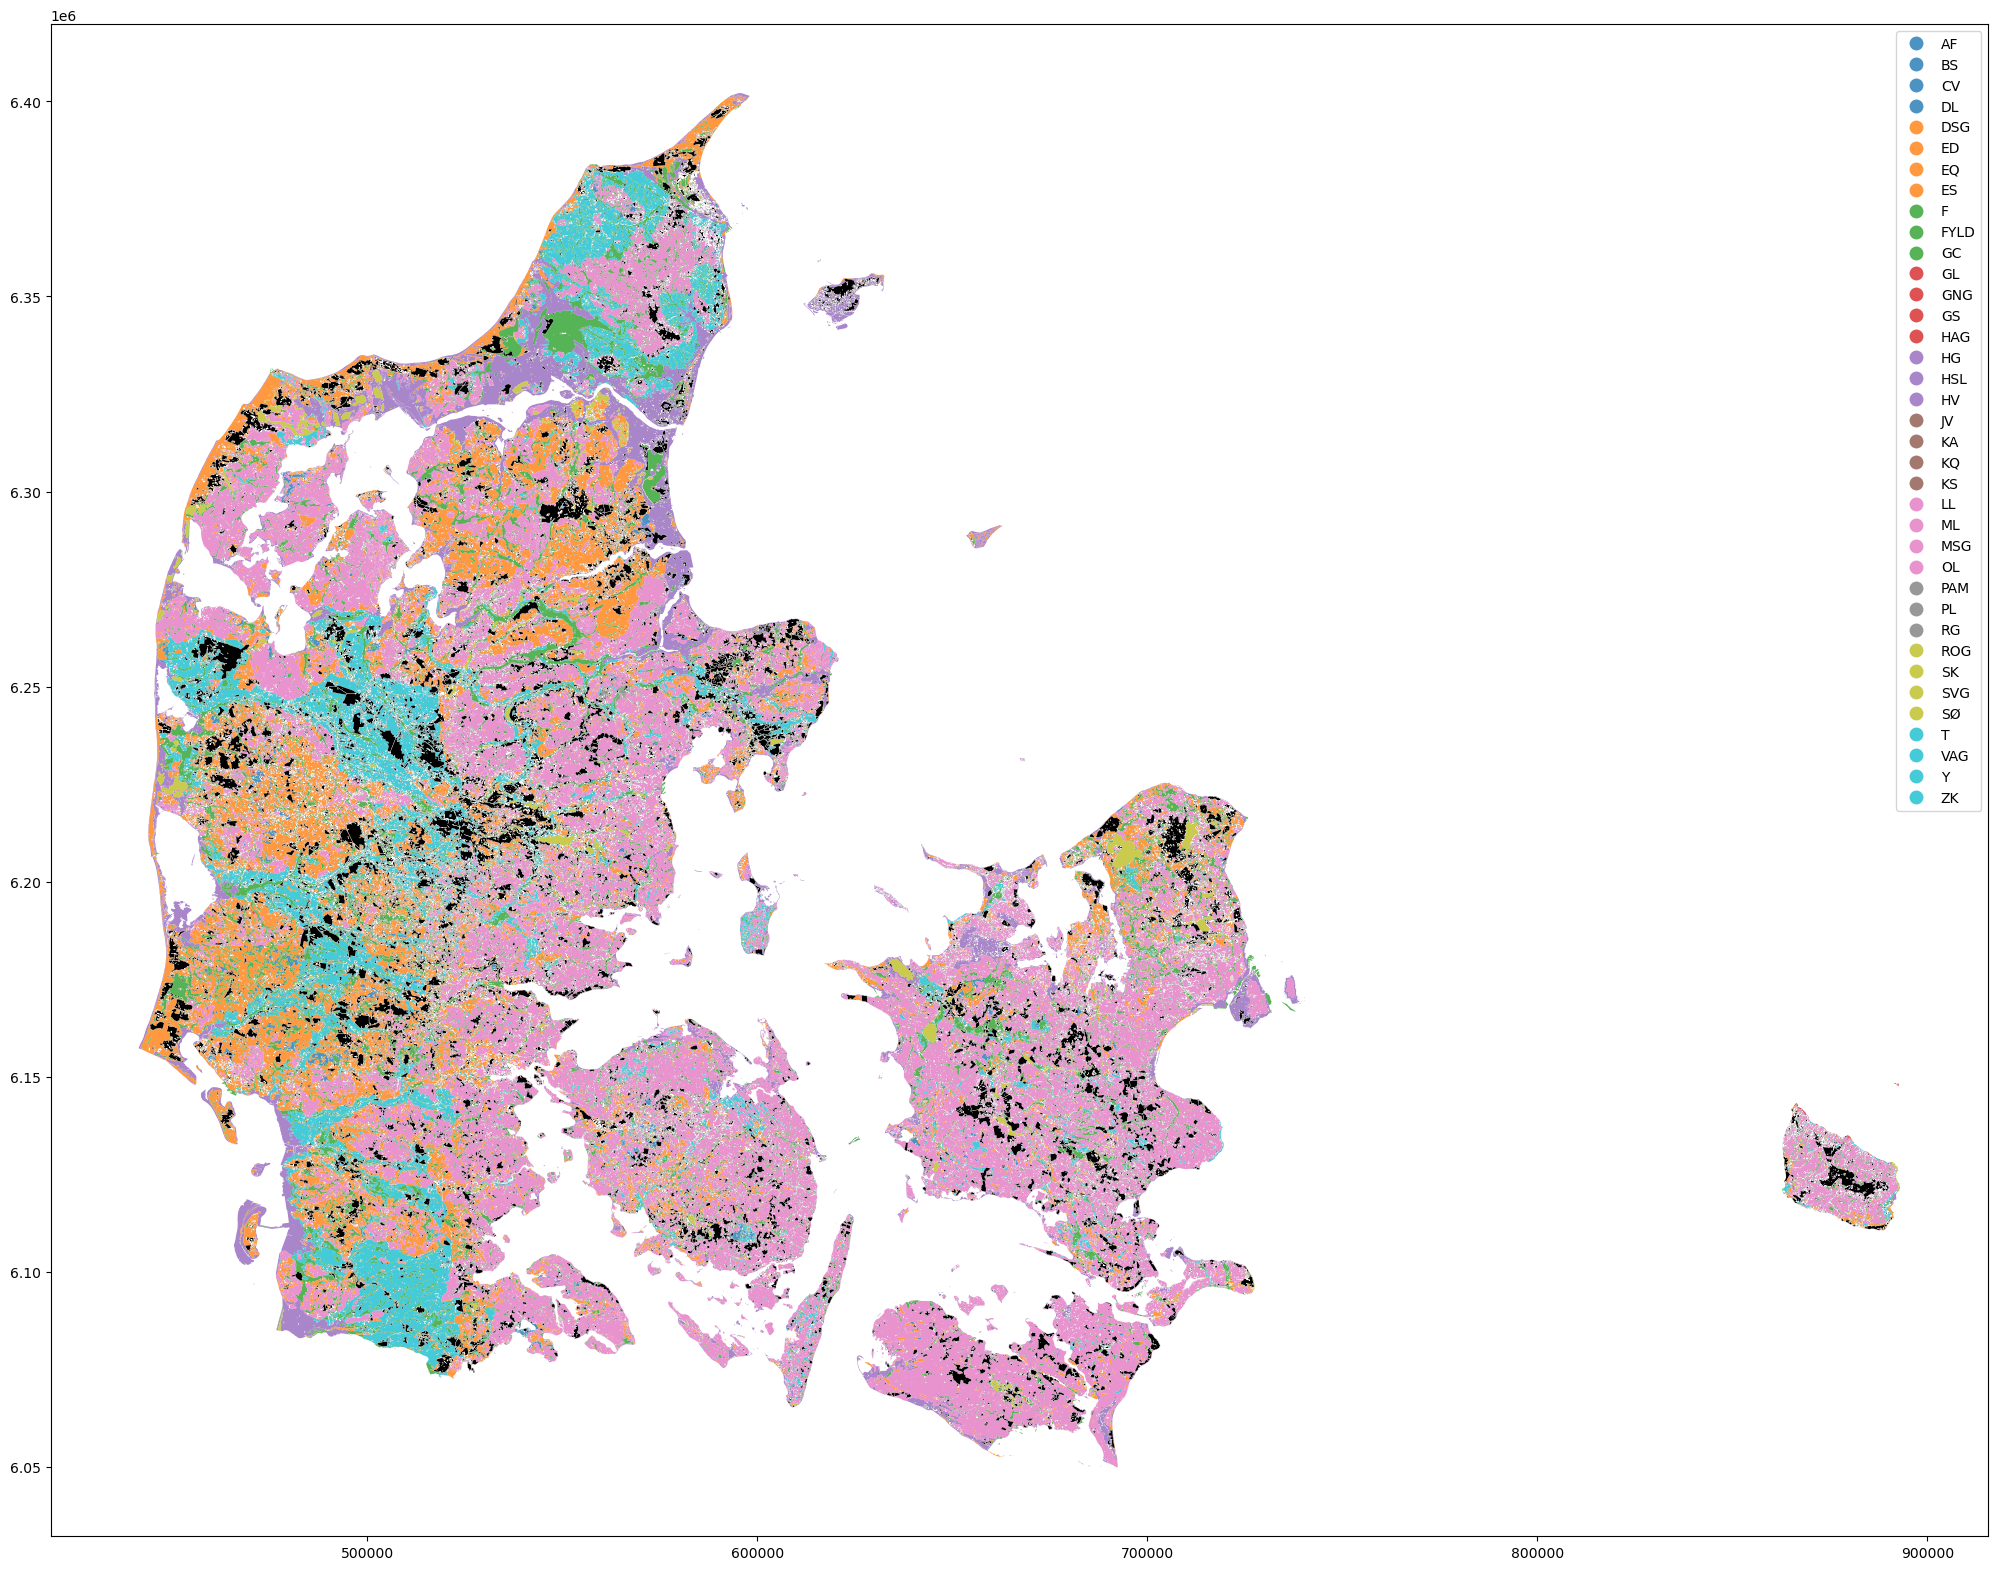

In [21]:
fig, ax = plt.subplots(figsize=(25, 25))
Denmark[Denmark['fclass'] == 'forest'].plot(ax=ax, color="black", edgecolor='white', linewidth=0.2, zorder=1)
soil_data.plot(column='TSYM', legend=True, ax=ax, figsize=(10, 10), alpha=0.8, zorder=0)

plt.show()

In [22]:
kyst_jordard = gpd.read_file("Soil/Jordart_200000_shape/Kyst_Jordart_200000.shp")

In [25]:
kyst_jordard.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

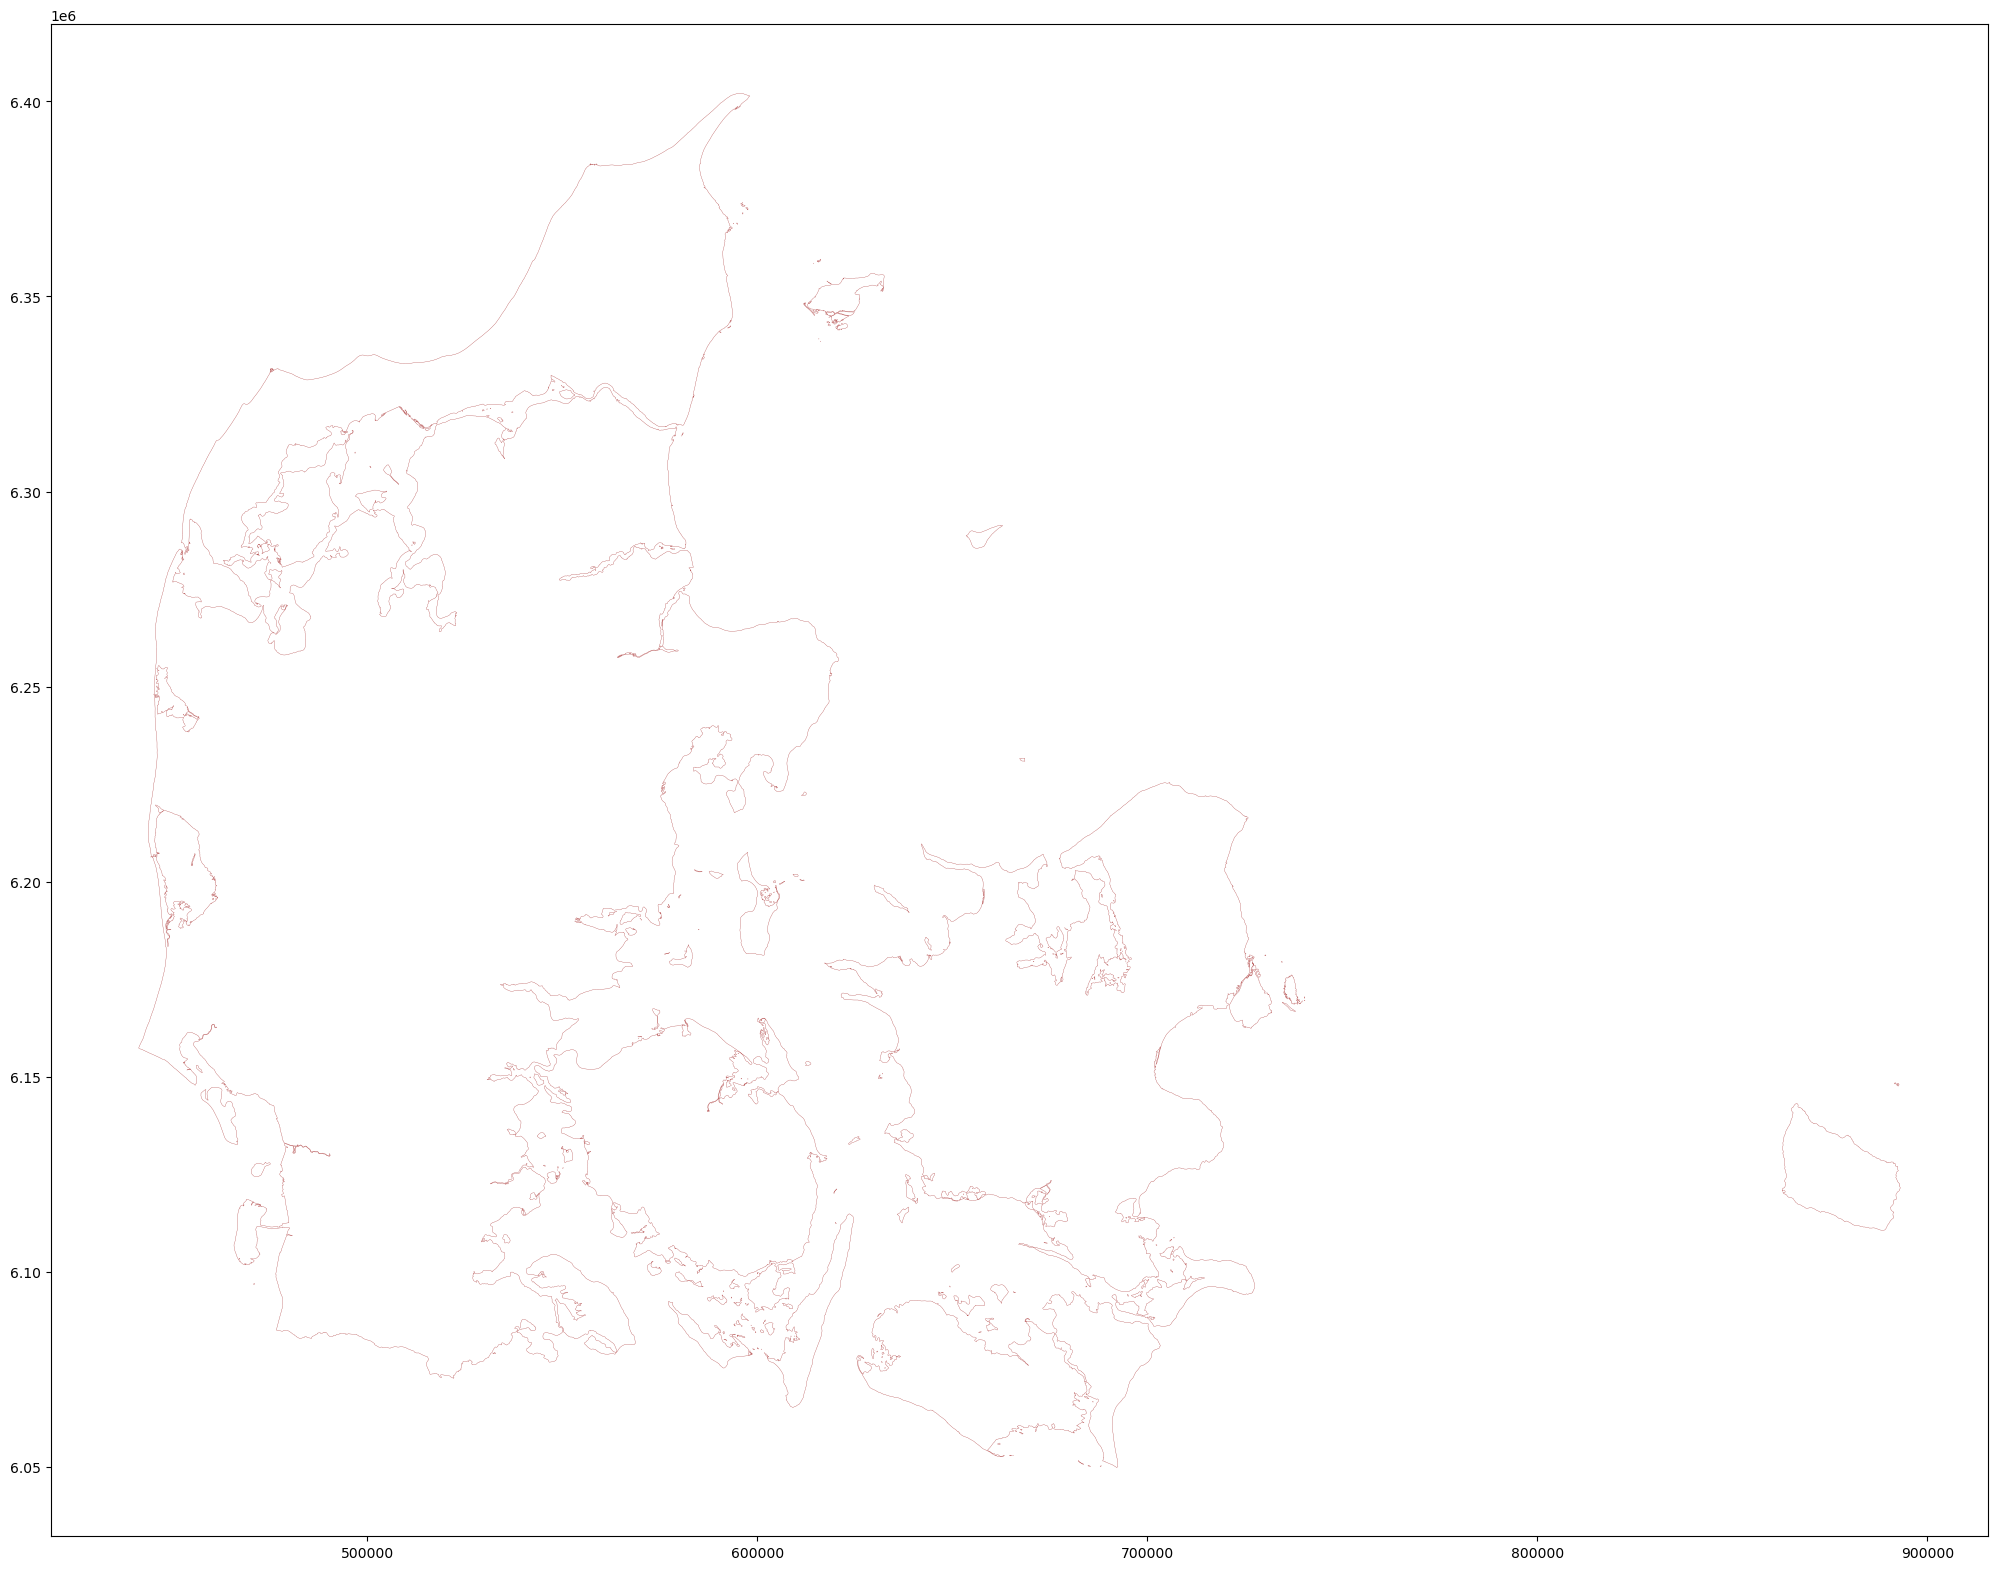

In [23]:
#visualize the kyst_jordart df
fig, ax = plt.subplots(figsize=(25, 25))
kyst_jordard.plot(ax=ax, color='brown', edgecolor='white', linewidth=0.2)

plt.show()

In [27]:
# Perform spatial join
denmark_with_soil = gpd.sjoin(Denmark, soil_data, how='left', op='intersects')

# Now denmark_with_soil will contain all the columns from Denmark dataframe 
# along with additional columns from soil_data dataframe where the polygons intersect

# Now denmark_with_soil dataframe contains the soil type information for each polygon in Denmark dataframe

c:\Users\steni\anaconda3\envs\Geospatial_DS_env\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [30]:
# for each type of soil, calculate the propotion of forest area in that soil type
forest_area_in_soil = denmark_with_soil.groupby('Type').geometry.apply(lambda x: x.unary_union.area)

In [32]:
forest_area_in_soil.sort_values(ascending=False)

Type
Moræneler                                           2.191323e+10
ferskvandsdannelser                                 1.445824e+10
Smeltevandssand og grus                             1.431466e+10
Marint sand og ler                                  6.640472e+09
Ekstramarginale aflejringer                         6.537477e+09
flyvesand                                           4.469710e+09
Morænesand og -grus                                 3.823089e+09
Strandvolde                                         2.572070e+09
SØ                                                  2.454633e+09
Smeltevandsler                                      2.207268e+09
FYLD                                                1.059739e+09
Marskaflejringer                                    8.207740e+08
Ældre havaflejringer                                6.951892e+08
Skrivekridt med flint                               4.725910e+08
Danienkalk med flint                                2.406547e+08
Den Bornholmske grå 